# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Data formatting and function definition

In [2]:
Dataset = pd.read_csv("final_dataset.csv", index_col=0)

X = Dataset.drop("Expression", axis = 1)
X[X<1e-2]=0
y = Dataset[["Subject number", "Expression"]]

## Training/Testing set
Keep only the last 2 subject (subject 14 and 15) as testing set 

In [3]:
X_train = X[X["Subject number"] < 40].drop("Subject number", axis = 1)
y_train = y[y["Subject number"] < 40]["Expression"]

X_test = X[X["Subject number"] >= 40].drop("Subject number", axis=1)
y_test = y[y["Subject number"] >= 40]["Expression"]

## Cross-validation function
Choose 5 random subject and iteratively use it as testing set

In [4]:
subjects = [x for x in range(53) if x != 7] #skip subject 7

def cross_val(model):
    scores = []
    for i in range(5):
        random.seed(i)
        subject = random.choices(subjects, k=10)
        X_tr = X[~X["Subject number"].isin(subject)].drop("Subject number", axis=1)
        y_tr = y[~y["Subject number"].isin(subject)]["Expression"]
        X_te = X[X["Subject number"].isin(subject)].drop("Subject number", axis=1)
        y_te = y[y["Subject number"].isin(subject)]["Expression"]
        model.fit(X_tr, y_tr)
        scores.append(model.score(X_te, y_te))
    return np.array(scores)

# K-Nearest Neighbor
Create model and evaluate score using train/test set split

In [5]:
knn_model = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
knn_model.score(X_test,y_test)

0.3859585303746817

## Confusion matrix on train/test set

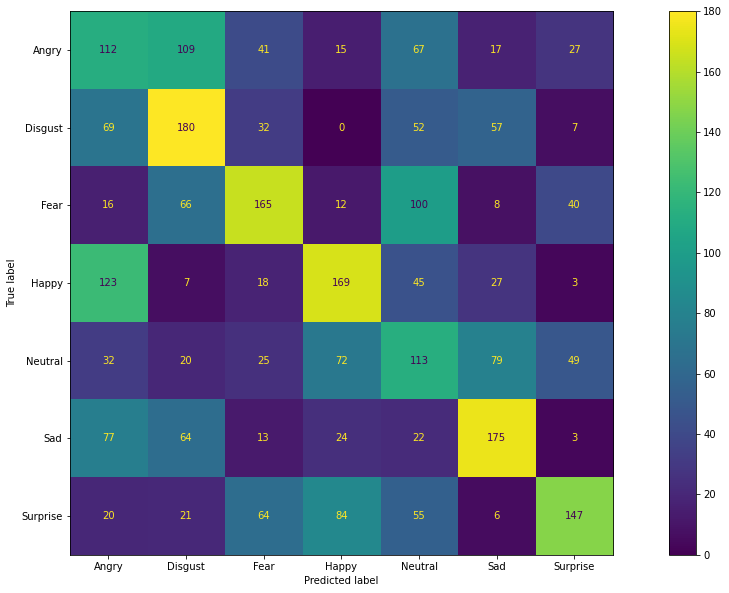

In [6]:
fig, ax = plt.subplots(figsize=(20, 10))
knn_cm = ConfusionMatrixDisplay.from_predictions(y_test, knn_model.predict(X_test), ax=ax)

## Cross-validation
Use cross-validation with each subject

In [7]:
knn_cross_val_scores = cross_val(knn_model)
print(knn_cross_val_scores)
print("%0.2f mean accuracy with a standard deviation of %0.2f" % (knn_cross_val_scores.mean(), knn_cross_val_scores.std()))

[0.28743719 0.41632089 0.33659379 0.34147609 0.3175712 ]
0.34 mean accuracy with a standard deviation of 0.04


## Hyperparameters tuning
Use GridSearchCV to find the best parameter `k` between `1` and `100`, use also cross-validation with `cv=10`

In [8]:
best_k = 1
best_score = 0
for k in range(1,50):
    knn2_model = KNeighborsClassifier(n_neighbors=k)
    score = cross_val(knn2_model).mean()
    if best_score < score : 
        best_score = score
        best_k = k

print("Best k : {0}, with score : {1}".format(best_k, best_score))

Best k : 13, with score : 0.3454155953803352


# XGBoost Tree
Create model and evaluate score

In [9]:
clf_model = GradientBoostingClassifier().fit(X_train, y_train)
print("accuracy : {}".format(clf_model.score(X_test, y_test)))

accuracy : 0.5103674063295743


## Confusion matrix

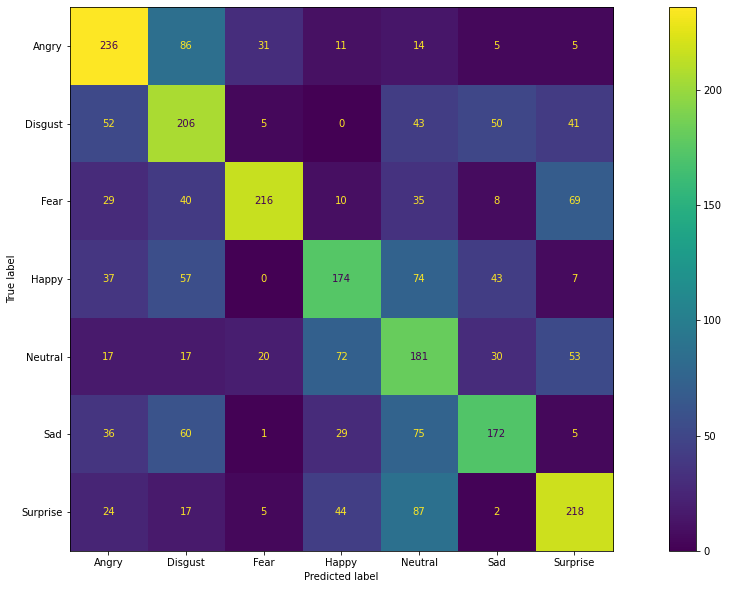

In [10]:
fig, ax = plt.subplots(figsize=(20, 10))
clf_cm = ConfusionMatrixDisplay.from_predictions(y_test, clf_model.predict(X_test), ax=ax)

## Cross-validation
Use cross-validation for each subject to see more realistic score

In [11]:
clf_cross_val_scores = cross_val(clf_model)
print(clf_cross_val_scores)
print("%0.2f mean accuracy with a standard deviation of %0.2f" % (clf_cross_val_scores.mean(), clf_cross_val_scores.std()))

[0.3678392  0.45043799 0.45512083 0.58835759 0.52391188]
0.48 mean accuracy with a standard deviation of 0.07


# Random Forest
Create model and evaluate score

In [12]:
rf_model = RandomForestClassifier().fit(X_train, y_train)
rf_model.score(X_test, y_test)

0.5161877046198617

## Confusion matrix

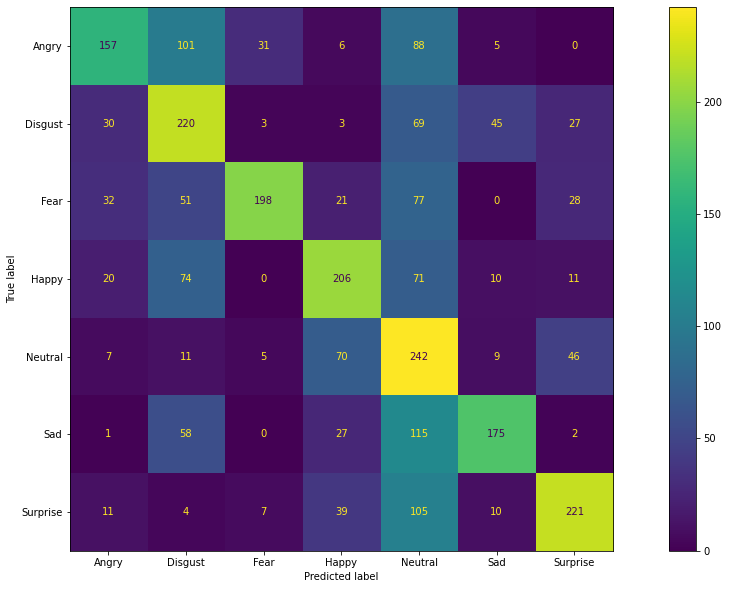

In [13]:
fig, ax = plt.subplots(figsize=(20, 10))
rf_cm = ConfusionMatrixDisplay.from_predictions(y_test, rf_model.predict(X_test), ax=ax)

## Cross-validation
Score using cross-validation

In [14]:
rf_cross_val_scores = cross_val(rf_model)
print(rf_cross_val_scores)
print("%0.2f mean accuracy with a standard deviation of %0.2f" % (rf_cross_val_scores.mean(), rf_cross_val_scores.std()))

[0.41155779 0.57445828 0.55638665 0.58835759 0.56045137]
0.54 mean accuracy with a standard deviation of 0.06


# LightGBM
Create model and evaluate score

In [15]:
gbm_model = LGBMClassifier().fit(X_train, y_train)
gbm_model.score(X_test, y_test)

0.5783921425973081

## Confusion matrix

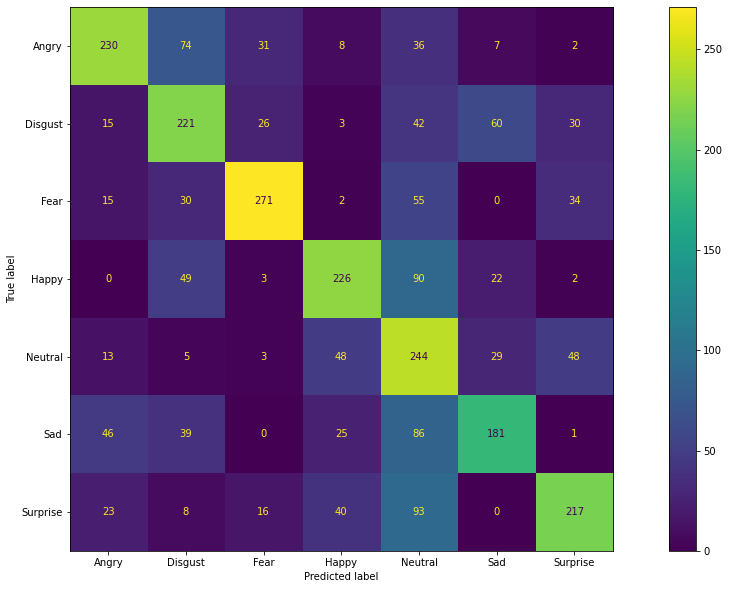

In [16]:
fig, ax = plt.subplots(figsize=(20, 10))
gbm_cm = ConfusionMatrixDisplay.from_predictions(y_test, gbm_model.predict(X_test), ax=ax)

## Cross-validation

In [17]:
gbm_cross_val_scores = cross_val(gbm_model)
print(gbm_cross_val_scores)
print("%0.2f mean accuracy with a standard deviation of %0.2f" % (gbm_cross_val_scores.mean(), gbm_cross_val_scores.std()))

[0.41859296 0.53803596 0.51668585 0.63253638 0.57173563]
0.54 mean accuracy with a standard deviation of 0.07


# SVM
Create model and evaluate score

In [18]:
svm_model = SVC().fit(X_train, y_train)
svm_model.score(X_test, y_test)

0.40123681338668604

## Confusion matrix

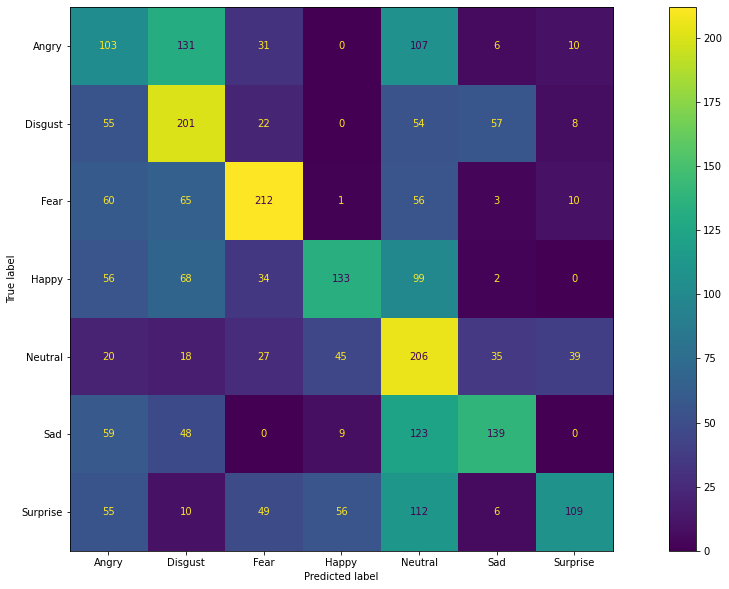

In [19]:
fig, ax = plt.subplots(figsize=(20, 10))
svm_cm = ConfusionMatrixDisplay.from_predictions(y_test, svm_model.predict(X_test), ax=ax)

## Cross-validation

In [20]:
svm_cross_val_scores = cross_val(svm_model)
print(svm_cross_val_scores)
print("%0.2f mean accuracy with a standard deviation of %0.2f" % (svm_cross_val_scores.mean(), svm_cross_val_scores.std()))

[0.33165829 0.41816505 0.39182969 0.43711019 0.3895755 ]
0.39 mean accuracy with a standard deviation of 0.04
